# Web Scrapping : Pharmeasy Website

## Importing Required Libraries

In [2]:

from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import re
import warnings
warnings.filterwarnings("ignore")


## Collectiing Data 

In [3]:


driver = webdriver.Chrome(executable_path = 'C:\\Users\\jishn\\Downloads\\chromedriver.exe')
site = 'https://pharmeasy.in/online-medicine-order?isSEM=true&utm_source=google&utm_medium=cpc&utm_campaign=GSB_New_CX_FP&utm_adgroup=OTC_Healthcare&gclid=CjwKCAjwnOipBhBQEiwACyGLugZAgevXP18DQUudU5i_5mNK5YA3CmeP9t-sKan1Dk4gET7DOA8ocRoCNI8QAvD_BwE'
driver.get(site)
time.sleep(3)
# driver.maximize_window()
search_tab = driver.find_element_by_xpath('''/html/body/div[1]/main/div/div[2]/section[1]/div[1]/div/div/div[3]/div/div[2]/div/div/input''')
search_tab.send_keys('cough syrup')
search_tab.send_keys(Keys.ENTER)
x=0#scroll  the page to the required level by using while
while True:
    x+=2
    driver.execute_script("scrollBy(0,200)")
    time.sleep(1)
    if x>200:#break the web page hight  at 400  then scroll will be stop
        break


soup = bs(driver.page_source, 'html.parser')# getting all the html tags from the page

## Creating lists to store the collected data
title = []

quantity = []

manufacturer = []

mrp = []

price = []

stock = []



box = soup.find('div', class_ = "Content_wrapper__0Gx95")# for the outer box
div = box.find_all('div', class_ = 'ProductCard_medicineUnitContentWrapper__8thFe')## for individual boxes


header = box.find_all('h1', class_ ='ProductCard_medicineName__8Ydfq')# for getting the product names
    
for i in header:
    head = i.text
    title.append(head) 
    
qty = box.find_all('div', class_ = 'ProductCard_measurementUnit__hsZ2o') # for getting the quantity
    
for i in qty:
    qt = i.text
    quantity.append(qt)  
    

my_list2=quantity #for removing the special characters
d=[re.sub(r'[^\d.]+', '', _) for _ in my_list2]

    
    
for i in div:# for getting manufacturer details
        try:
            span_element = i.find('div', class_ = 'ProductCard_brandName__kmcog')
            span_text = span_element.text
            manufacturer.append(span_text)
        except:
            manufacturer.append("null")

       
        


for i in div:# for getting MRP
    try:
        span_element = i.find('span', class_ = 'ProductCard_striked__jkSiD')
        span_text = span_element.text
        mrp.append(span_text)
    except:
        span_element = i.find('div', class_ = 'ProductCard_ourPrice__yDytt')
        span_text = span_element.text
        mrp.append(span_text)
        
        

my_list=mrp   # for removing special characters
c=[re.sub(r'[^\d.]+', '', _) for _ in my_list]
print(len(c))

for i in div:# for getting selling price

    try:
        box1 = i.find('div', class_ ='ProductCard_warningPriceInfo__Dod00')
        span_element = box1.find('span', class_ = False)
        span_text = span_element.text
        price.append(span_text)
    except:
        span_element = i.find('div', class_ = 'ProductCard_ourPrice__yDytt')
        span_text = span_element.text
        price.append(span_text)
            
#remove the spl charaacter in offer prices
my_list1=price
b=[re.sub(r'[^\d.]+', '', _) for _ in my_list1]

# f = []

for j in div: # for the stock details
    stok = j.find('div', class_ = 'ProductCard_ctaInformation__ot9e5')
    k = stok.text
  
    if k == 'Add To Cart':
        stock.append('In stock')
    else:
        stock.append('Out of stock')

print(len(title)) # to check all datas are collected 
print(len(manufacturer))
print(len(d))
print(len(stock))
print(len(b) )     
print(len(c) )   


    



100
100
100
100
100
100
100


In [9]:
 #converting to dataframe 
data = pd.DataFrame({'Product Name': title, 'Quantity': d, 'Manufacturer': manufacturer, 'MRP': c, 'Selling Price':b, 'Stock Details': stock  })
data.head(10)

,Product Name,Quantity,Manufacturer,MRP,Selling Price,Stock Details
0,Amrutanjan Extra Power Yellow Pain Balm 50 Ml,50,By AMRUTANJAN EXTRA POWER,140.00,127.40,In stock
1,Benadryl Cough Formula Bottle Of 150ml Syrup,150,By JOHNSON & JOHNSON PRIVATE LIMITED,141.00,119.85,In stock
2,Vicks Inhaler Keychain Pack Of 1,1,By VICKS INHALER,67.00,66.33,In stock
3,Vicks Vaporub 25ml Relief From Cold Cough Head...,25,By VICKS VAPORUB,99.00,96.03,In stock
4,Amrutanjan Strong Pain Relief Balm Bottle Of 8 Ml,8,By AMRUTANJAN STRONG,42.00,41.58,In stock
5,Vicks Vaporub 10ml Relief From Cold Cough Head...,10,By VICKS VAPORUB,45.00,44.55,In stock
6,Vicks Vaporub 5ml Relief From Cold Cough Heada...,5,By VICKS VAPORUB,24.00,21.60,In stock
7,Amrutanjan Advanced Pain Relief Spray Bottle O...,80,By AMRUTANJAN,210.00,199.50,In stock
8,Vicks Cough Drops Jar Of 1180+120 Ginger Flavo...,1300,By VICKS,1280.00,1267.20,In stock
9,"Vicks Cough Drops Mixed 1280+120 Free, Bottle ...",1280,By VICKS,1280.00,1216.00,In stock


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   100 non-null    object
 1   Quantity       100 non-null    object
 2   Manufacturer   100 non-null    object
 3   MRP            100 non-null    object
 4   Selling Price  100 non-null    object
 5   Stock Details  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [12]:
data['Stock Details'] = data['Stock Details'].replace({'In stock' : 1, 'Out of stock':0})
data.head()

,Product Name,Quantity,Manufacturer,MRP,Selling Price,Stock Details
0,Amrutanjan Extra Power Yellow Pain Balm 50 Ml,50,By AMRUTANJAN EXTRA POWER,140.00,127.40,1
1,Benadryl Cough Formula Bottle Of 150ml Syrup,150,By JOHNSON & JOHNSON PRIVATE LIMITED,141.00,119.85,1
2,Vicks Inhaler Keychain Pack Of 1,1,By VICKS INHALER,67.00,66.33,1
3,Vicks Vaporub 25ml Relief From Cold Cough Head...,25,By VICKS VAPORUB,99.00,96.03,1
4,Amrutanjan Strong Pain Relief Balm Bottle Of 8 Ml,8,By AMRUTANJAN STRONG,42.00,41.58,1


In [13]:
data_types = {'Product Name': object, 'Quantity': int, 'Manufacturer':object, 'MRP': float, 'Selling Price': float,  'Stock Details': int  }
data = data.astype(data_types)

In [14]:
data.tail()

,Product Name,Quantity,Manufacturer,MRP,Selling Price,Stock Details
95,Cough Syrup 4.5ltr,4500,By ZYDUS HEALTHCARE LIMITED,45.0,38.25,0
96,Siocof Cough Syrup 100ml,100,By CURE QUICK PHARMACEUTICALS,59.0,50.15,0
97,Salbid D Cough Syrup 100ml,100,By MICRO LABS,48.0,40.80,0
98,Tulvak Cough Syrup 100ml,100,null,90.0,76.50,0
99,Siocof Cough Syrup 60ml,60,By CURE QUICK PHARMACEUTICALS,69.0,58.65,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   100 non-null    object 
 1   Quantity       100 non-null    int32  
 2   Manufacturer   100 non-null    object 
 3   MRP            100 non-null    float64
 4   Selling Price  100 non-null    float64
 5   Stock Details  100 non-null    int32  
dtypes: float64(2), int32(2), object(2)
memory usage: 4.0+ KB


In [26]:
data['Savings %'] = round(((data['MRP']-data["Selling Price"])/data['MRP'])*100, 1)

In [27]:
data.head()

,Product Name,Quantity,Manufacturer,MRP,Selling Price,Stock Details,Savings %
0,Amrutanjan Extra Power Yellow Pain Balm 50 Ml,50,By AMRUTANJAN EXTRA POWER,140.0,127.40,1,9.0
1,Benadryl Cough Formula Bottle Of 150ml Syrup,150,By JOHNSON & JOHNSON PRIVATE LIMITED,141.0,119.85,1,15.0
2,Vicks Inhaler Keychain Pack Of 1,1,By VICKS INHALER,67.0,66.33,1,1.0
3,Vicks Vaporub 25ml Relief From Cold Cough Head...,25,By VICKS VAPORUB,99.0,96.03,1,3.0
4,Amrutanjan Strong Pain Relief Balm Bottle Of 8 Ml,8,By AMRUTANJAN STRONG,42.0,41.58,1,1.0


In [28]:
data.to_csv(r'C:\Users\jishn\OneDrive\Desktop\syrup_data.csv')

## EDA

<Axes: xlabel='Stock Details', ylabel='count'>

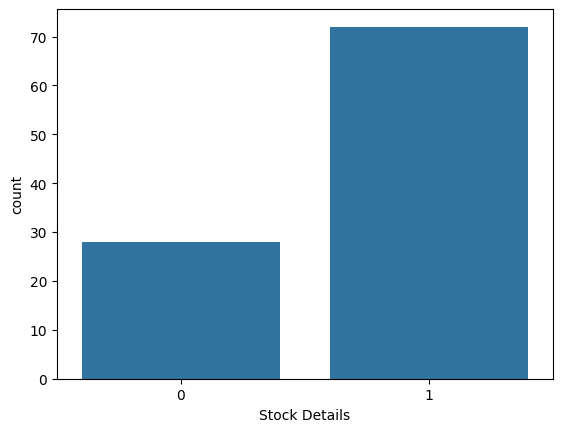

In [19]:
import seaborn as sns
df= data
sns.countplot(x = 'Stock Details', data= df)

<Axes: xlabel='Quantity', ylabel='MRP'>

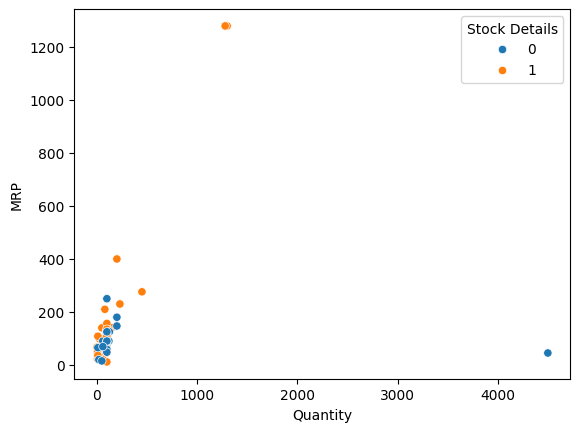

In [20]:
sns.scatterplot(x="Quantity", y='MRP', hue='Stock Details' ,data= data)

<Axes: xlabel='Selling Price', ylabel='Density'>

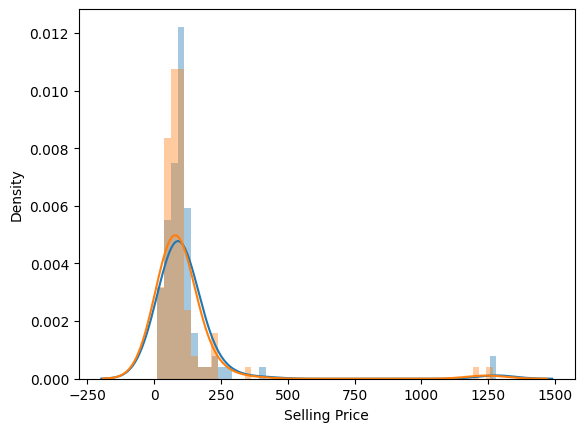

In [21]:
sns.distplot(data.MRP,label = 'Mrp',  kde = True )
sns.distplot(data['Selling Price'],label = 'SP',  kde = True )




<Axes: xlabel='Stock Details', ylabel='Savings %'>

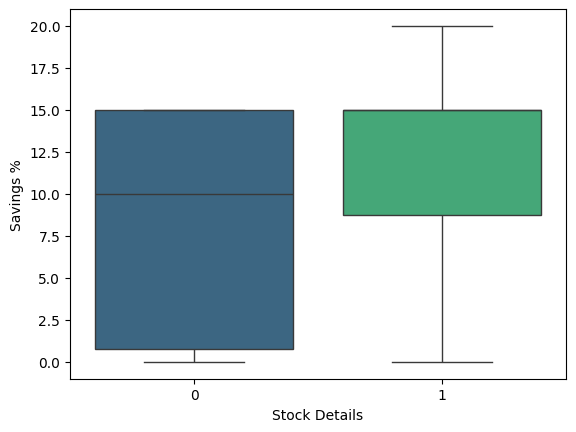

In [22]:
sns.boxplot(x='Stock Details', y='Savings %', data= data, palette= 'viridis')

<Axes: xlabel='Stock Details', ylabel='MRP'>

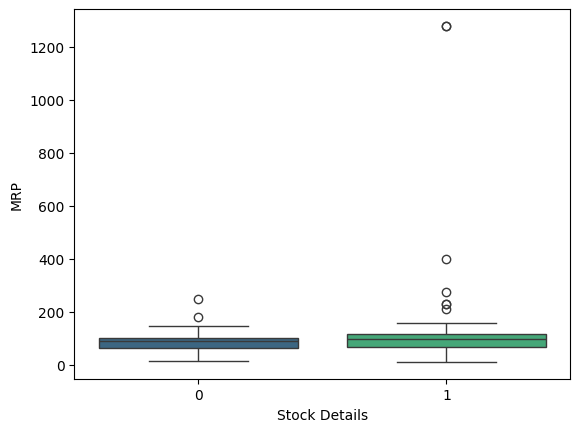

In [23]:
sns.boxplot(x='Stock Details', y='MRP', data= data, palette= 'viridis')

<Axes: xlabel='Stock Details', ylabel='Selling Price'>

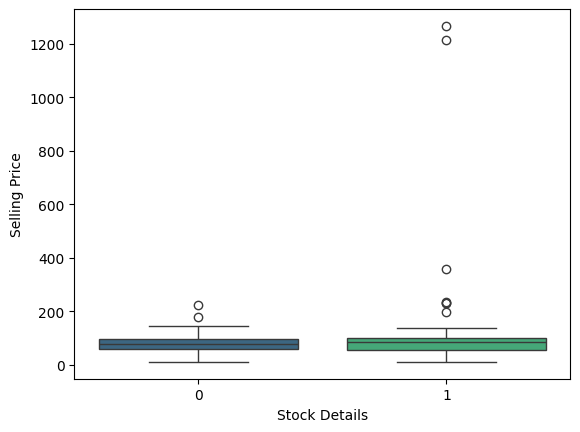

In [24]:
sns.boxplot(x='Stock Details', y='Selling Price', data= data, palette= 'viridis')